In [15]:
#Spam detection using Support Vector Machine in Python

In [16]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np 

# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

In [17]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving spam_ham_dataset.csv to spam_ham_dataset (1).csv


In [18]:
#Read the CSV file
df = pd.read_csv('spam_ham_dataset.csv')

#Print the first 10 rows of data
df.head(10)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [21]:
#Rename columns as category and message
df.rename(columns = {'Unnamed: 0':'Random', 'label':'Category', 'label_num': 'TrueorFalse'}, inplace = True)
df.head(10)

,Random,Category,text,TrueorFalse
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [22]:
print(f'Dataset consist of {df.shape[0]} E-Mails.')

Dataset consist of 5171 E-Mails.


In [23]:
df['Category'].value_counts()

ham     3672
spam    1499
Name: Category, dtype: int64

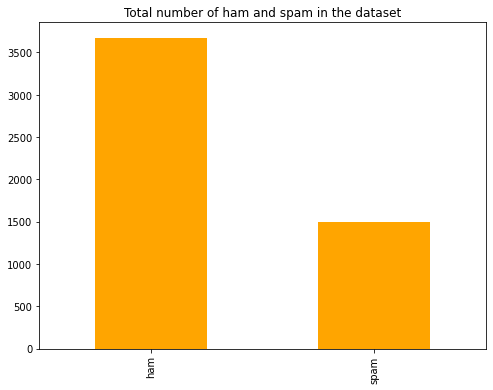

In [24]:
plt.figure(figsize=(8,6))

df['Category'].value_counts().plot.bar(color = ["orange","orange"])
plt.title('Total number of ham and spam in the dataset')
plt.show()

In [ ]:
#0: Ham, 1: Spam
df['Category']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

In [26]:
#0: Ham, 1: Spam
df['Category']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Random,Category,text,TrueorFalse
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0


In [28]:
X=df['text']
Y=df['Category']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [30]:
#Support Vector Machine

#SVM distinguishes classes by drawing a decision boundary. How to draw or determine the decision boundary is the most critical part in SVM algorithms.
#Before creating the decision boundary, each observation (or data point) is plotted in n-dimensional space. “n” is the number of features used. For instance, if we use “length” and “width” to classify different “cells”, observations are plotted in a 2-dimensional space and decision boundary is a line. 
#If we use 3 features, decision boundary is a plane in 3-dimensional space. If we use more than 3 features, decision boundary becomes a hyperplane which is really hard to visualize.

#Decision boundary is drawn in a way that the distance to support vectors are maximized. If the decision boundary is too close to a support vector, it will be highly sensitive to noises and not generalize well. Even very small changes in independent variables may cause a misclassification.

#The data points are not always linearly separable like in the figure above. In these cases, SVM uses kernel trick which measures the similarity (or closeness) of data points in a higher dimensional space in order to make them linearly separable.

#Kernel function is kind of a similarity measure. The inputs are original features and the output is a similarity measure in the new feature space.
#Similarity here means a degree of closeness. It is a costly operation to actually transform data points to a high-dimensional feature space. 
#The algorithm does not actually transform the data points to a new, high dimensional feature space. Kernelized SVM compute decision boundaries in terms of similarity measures in a high-dimensional feature space without actually doing a transformation. I think this is why it is also called kernel trick.

#SVM is especially effective in cases where number of dimensions are more than the number of samples. When finding the decision boundary, SVM uses a subset of training points rather than all points which makes it memory efficient. On the other hand, training time increases for large datasets which negatively effects the performance.


In [31]:
clf_svm= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('svc', SVC(kernel="rbf",C=1000,gamma=0.001))
])

In [32]:
clf_svm.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('svc', SVC(C=1000, gamma=0.001))])

In [33]:
y_pred_SVM=clf_svm.predict(X_test)

In [34]:
svm_acc=accuracy_score(y_test,y_pred_SVM)
svm_acc

0.9590100541376644

In [35]:
#Test
def spam_dect(clf,txt):
    a=clf.predict([txt])
    if a==1:
        print(f"{clf[1]} This is a Spam email \n")
    else:
        print(f"{clf[1]} This is a Real email \n")

In [37]:
message= input()

i know you where in trouble Jason


In [38]:
clf_1 = clf_svm
i = [clf_1]
for x in i:
  spam_dect(x,message)

SVC(C=1000, gamma=0.001) This is a Spam email 

